In [1]:
import matplotlib.pyplot as plt
from ddeint import ddeint
import numpy as np
import time

def func_f(u, a):
    return 1-(a+1)*u/(u+1)

def func_g(u):
    return u/(1+u)

def func_h(u, c):
    return 1-(c+1)*u/(u+c)

def func_F(x, a, eps):
    return func_f(np.exp(x/eps), a)

def func_G(x, eps):
    return func_g(np.exp(x/eps))

def func_H(x, b, eps):
    return func_h(np.exp(x/eps), b)

a = 1
b = 1
c = 1
m = 10
k = 1
eps=0.1

def initial(t):
    res = np.zeros(m) #np.arange(m)/m
    for idx in range(m):
        res[idx] = np.sin(2*np.pi*t+float(idx)/m)
    return res

def model(X, t, a,b,c,k,eps):
    res = np.zeros(m)
    res[0] = func_F(X(t-1)[0],a,eps) + b*func_G(X(t)[m-1],eps)*func_H(X(t)[0]-X(t)[m-1], b, eps)
    for idx in range(1,m):
        res[idx] = func_F(X(t-1)[idx],a,eps) + b*func_G(X(t)[idx-1],eps)*func_H(X(t)[idx]-X(t)[idx-1], b, eps)    
    return res

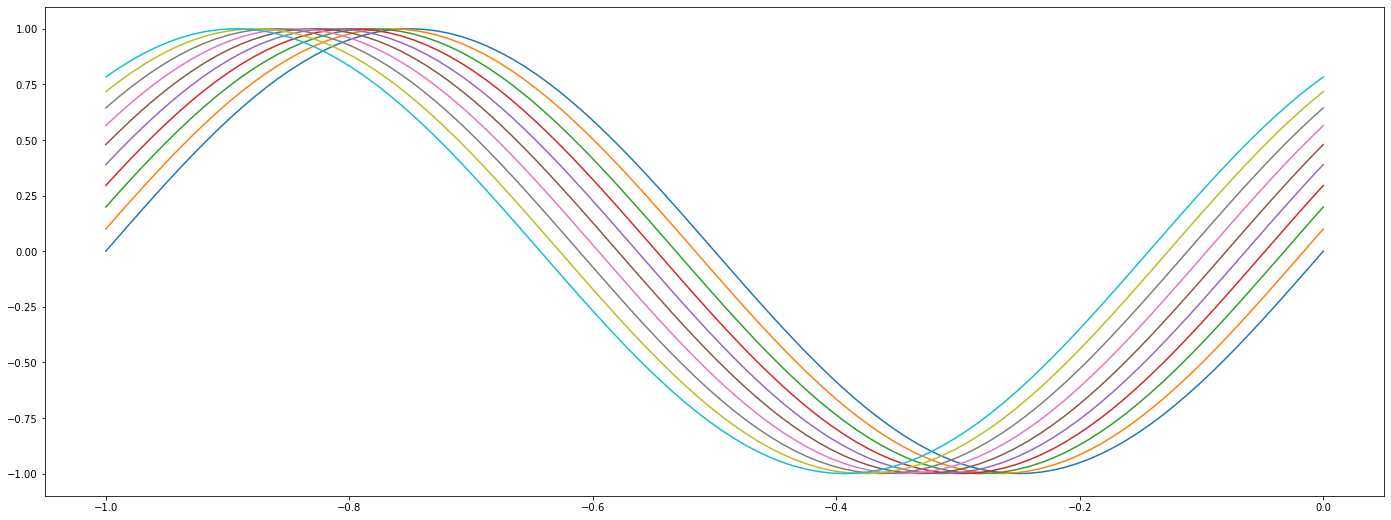

In [2]:
#Plot initial function
tinit = np.linspace(-1,0,100)
xinit = np.zeros((100,m))
for idx, t in enumerate(tinit):
    xinit[idx] = initial(t)
    
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tinit, xinit[:,idx])

In [3]:
#COMPUTATIONS
finalT = 50
starttime = time.time()
tt = np.linspace(0, finalT, finalT*1000)
xx = ddeint(model, initial, tt, fargs=(a,b,c,k,eps))
print("Finished in", time.time()-starttime, "s.")

Finished in 633.0751221179962 s.


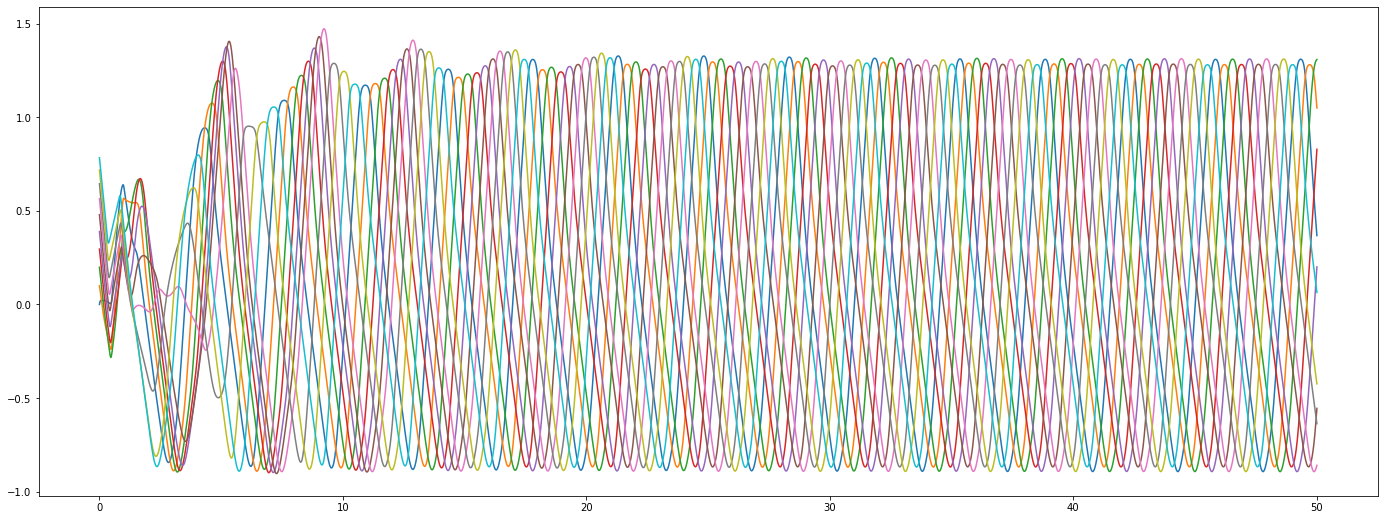

In [4]:
#Plot full solution
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tt, xx[:,idx])

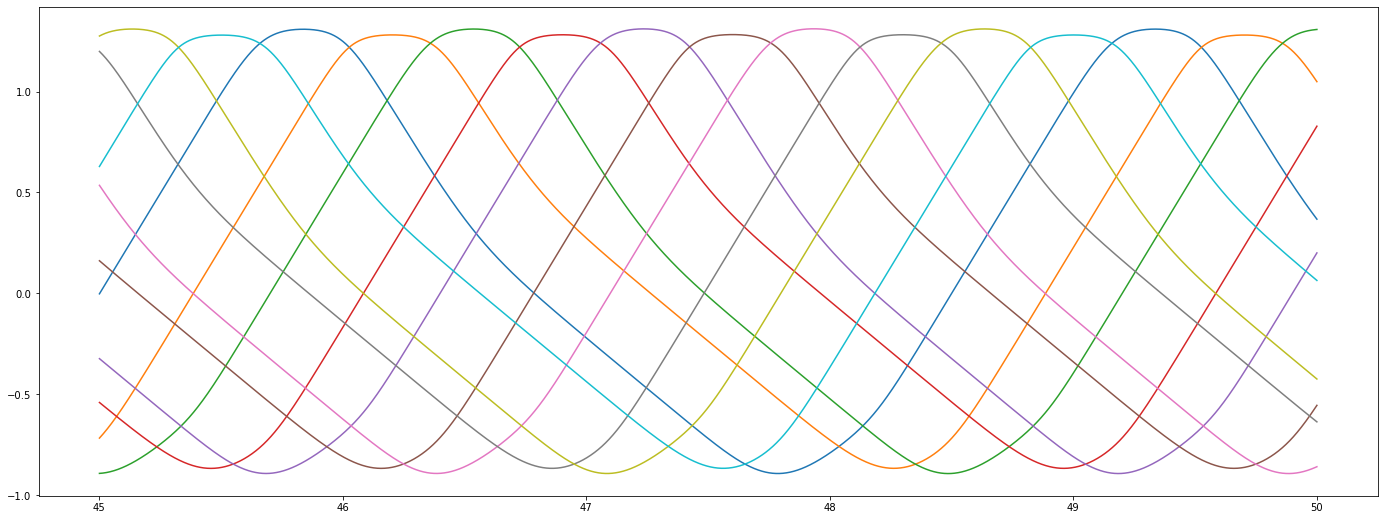

In [5]:
#Plot final 10% of solution
final10pr = int(tt.shape[0]*9/10)
plt.rcParams["figure.figsize"] = (24,9)
for idx in range(m):
    plt.plot(tt[final10pr:], xx[final10pr:,idx])

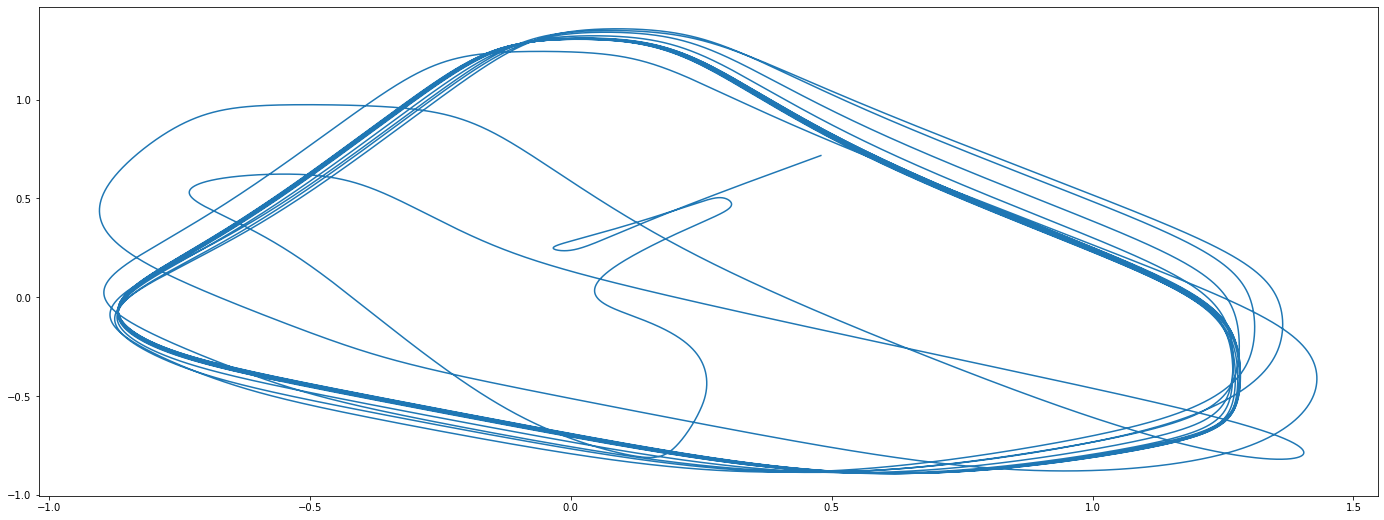

In [6]:
#Plot phase portrait
axis1 = 5
axis2 = 8
plt.rcParams["figure.figsize"] = (24,9)
plt.plot(xx[:, axis1], xx[:, axis2])